# Capstone #2 Notebook - two 'types' (after resampling)

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import sentiwordnet as swn

## Initial Sampling

First, resize the dataset from 1,000,000 articles to 10,000 articles that are either 'fake' or 'reliable'

In [3]:
c_size = 100000

listofchunks = []
for chunk in pd.read_csv("sampled_data1.csv",chunksize=c_size, lineterminator='\n', index_col=[0]):
    print(chunk.shape)
    listofchunks.append(chunk)

FileNotFoundError: [Errno 2] File b'sampled_data1.csv' does not exist: b'sampled_data1.csv'

In [4]:
df_concat = pd.concat(listofchunks)


ValueError: No objects to concatenate

In [5]:
df_concat.shape

NameError: name 'df_concat' is not defined

In [ ]:
df_concat.head(20)

In [3]:
new_df = df_concat[(df_concat['type'] == 'reliable') | (df_concat['type'] == 'fake') ]

NameError: name 'df_concat' is not defined

In [4]:
new_df.head()

NameError: name 'new_df' is not defined

In [5]:
new_df.shape

NameError: name 'new_df' is not defined

In [6]:
fake_new_df = new_df[new_df['type']== 'fake'].sample(n=10000, random_state=0)


NameError: name 'new_df' is not defined

In [14]:
fake_new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
8124,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1824,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
6585,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
8109,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
6802,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [15]:
reliable_new_df = new_df[new_df['type']== 'reliable'].sample(n=10000, random_state=0)



In [16]:
reliable_new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
6243,8565302,nytimes.com,reliable,https://www.nytimes.com/2002/06/12/world/castr...,President Fidel Castro of Cuba has called for ...,2018-02-11 00:36:49.247979,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Castro Calls March Against Bush's Criticism,NaN,NaN,"['CUBA', 'CASTRO FIDEL', 'BUSH GEORGE W', 'U...",Pres Fidel Castro calls for massive marches by...,NaN,NaN,nytimes
5016,9094077,nytimes.com,reliable,https://www.nytimes.com/2007/11/16/us/16missis...,"State officials, from Gov. Haley Barbour on do...",2018-02-11 00:42:02.956512,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"In Mississippi, Poor Lag in Hurricane Aid",Leslie Eaton,NaN,"['Mississippi', 'Hurricane Katrina', 'Federal ...",The state is the only one for which the White ...,NaN,NaN,nytimes
1433,8177850,in.reuters.com,reliable,http://in.reuters.com/video/2016/11/06/prisone...,Prisoners get out of jail for papal Mass at Va...,2016-11-06T21:31:24.468+02:00,2018-02-10 13:43:39.521661,2018-02-10 13:43:39.521686,Prisoners get out of jail for papal Mass at Va...,NaN,NaN,NaN,NaN,NaN,NaN,webhose
5821,9344883,nytimes.com,reliable,https://www.nytimes.com/2010/07/17/opinion/lwe...,To the Editor:\n\nRe “Toyota Concedes 2 Flaws ...,2018-02-11 00:44:30.539865,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Actions Taken by Toyota,NaN,NaN,"['Toyota Motor Corp', 'Automobile Safety Featu...",A reader responds to a recent article.,NaN,NaN,nytimes
2596,9461692,nytimes.com,reliable,https://www.nytimes.com/2011/12/02/business/fo...,“He is pushing them in a totally different dir...,2018-02-11 00:45:38.510127,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Ford Strives for Elegance in Lincoln Brand,Bill Vlasic,NaN,"['Ford Motor Company', 'Lincoln Division of Fo...",The automaker is striving to restore the luste...,NaN,NaN,nytimes


In [17]:
complete_new_df = pd.concat([fake_new_df, reliable_new_df])

In [18]:
complete_new_df.shape

(20000, 16)

In [21]:
complete_new_df.to_csv('complete_new_data.csv', index=False)

## Load in and examine Data

In [6]:
df = pd.read_csv('complete_new_data.csv')

In [7]:
df.shape

(20000, 16)

In [8]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [9]:
df = df.rename_axis('document')

In [10]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


There is little useful information in the columns 'Unnamed:', 'tags', 'summary', and 'source'. Drop these columns.

In [11]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
document,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN
5,6916755,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2011/0...,Chinese Drywall Complaint Center Urges Florida...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Chinese Drywall Complaint Center Urges Florida...,Pr Web,NaN,[''],NaN
6,6117241,beforeitsnews.com,fake,http://beforeitsnews.com/alternative/2017/04/m...,Maine pushes to make it harder for voter initi...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Maine pushes to make it harder for voter initi...,NaN,NaN,[''],NaN
7,5146269,beforeitsnews.com,fake,http://beforeitsnews.com/vietnamese/2014/03/6-...,% of readers think this story is Fact. Add you...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,6 thông tin kinh tế nổi bật tuần từ 09/03 - 14/03,NaN,NaN,[''],NaN
8,6711496,beforeitsnews.com,fake,http://beforeitsnews.com/media/2014/11/high-re...,High-resolution geological map of asteroid Ves...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,High-resolution geological map of asteroid Ves...,The Watchers,NaN,[''],NaN


What are the different types of fake news represented in the dataset?

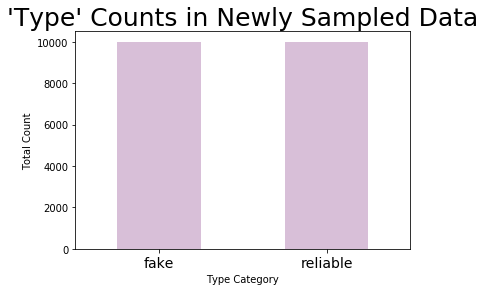

In [12]:
df.type.value_counts().plot(kind='bar', color='thistle')
plt.xlabel('Type Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts in Newly Sampled Data", fontsize=25)
plt.savefig('typecounts.png', bbox_inches='tight')

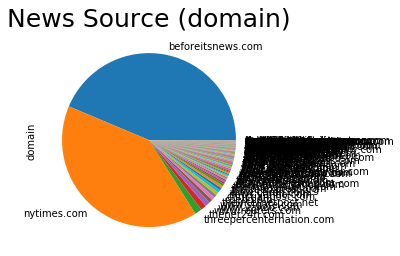

In [13]:

df.domain.value_counts().plot(kind='pie')
plt.title("News Source (domain)", fontsize=25)
plt.savefig('newssourcepie.png', bbox_inches='tight')

In [14]:
len(df.domain.unique())

141

Examine some 'content' values for the categories a little bit before delving into text analysis.

In [15]:
pd.set_option('display.max_colwidth', 1000)
print (df[df['type']=='fake']['content'].head())

document
0                                                                                                                                                                                                                                                                                                                                                                                                                           (Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more gre

# Sentiment Analysis

In [16]:
fake = df[df['type']=='fake']

In [17]:
fake.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com\n\n(Before It's News)\n\nCrown Equity Holdings Inc. (CRWE) Crown Equity Holdings Inc. (CRWE.OB) www.crownequityholdings.com,announced that it has launched two new online service companies. CRWE Direct and CRWE Real Estate. With expertise in online solutions and marketing, Crown Equity Holdings Inc. has launched CRWE Real Estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. The other is CRWE Direct (www.crwedirect.com), an online business-to-business (B2B) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. Manufacturers may start downloading their product immediately, free of charge during the next six months. Thereafter, there will be various annual fees. The listing process and image loading for both sites are user-friendly. Commenting on the launch, “The 2010 U.S. Census data shows estimates for B2B revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nSAN DIEGO, CA–(Marketwire – Aug 17, 2012) – The Barona Band of Mission Indians recently celebrated the 80th anniversary of the beginning of the historic Catholic Mission, a small stucco church on the reservation that was designed by renowned San Diego architect Irving J. Gill in the 1930s.\n\nThe celebration, which was attended by Tribal elders, Tribal members, parishioners and community residents, coincided with the Feast of the Assumption. A healing service and traditional blessing of the animals was also part of the celebration for the Mission that has served as a spiritual home for members of the Barona Tribe for 80 years.\n\nThe church has always been a source of pride for the people of Barona. It was the first building constructed on the reservation after the Tribe was relocated to the Barona Valley in the early 1930s when they were forced from their Capitan Grande reservation so the City of ...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80th Anniversary of the Beginning of the Barona Mission,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-for-it-2763030.html,"Go for it\n\n(Before It's News)\n\nThe morning after the morning we know who the next prime minister will be, the Bank of Canada takes centre stage. On Octobe

In [18]:
fake.shape

(10000, 16)

In [19]:
fakecontent = set()

In [20]:
for index, row in fake.iterrows():
    fakecontent.add(row['content'])

In [60]:
print (len(fakecontent))

8994


In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for doc in fakecontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    results.append(pol_score)




In [62]:
fakedf = pd.DataFrame.from_records(results)

In [63]:
fakedf.shape

(8994, 5)

In [64]:
fakedf.head()

,compound,content,neg,neu,pos
0,0.8074,BrotherJohnF: Silver Update 2/22/12 Volcker Rule\n\n% of readers think this story is Fact. Add your two cents.\n\n(Before It's News)\n\nBe prepared for the next great transfer of wealth. Buy physical silver and storable food.\n\nOccupy the SEC exposes how Wall Street is using “regulatory arbitrage” to break the Volcker Rule http://www.brotherjohnf.com/uncategorized/occupy-the-sec-exposes-how-wall-street-is-using-regulatory-arbitrage-to-break-the-volcker-rule/\n\nVolcker Rule http://en.wikipedia.org/wiki/Volcker_Rule\n\nCSPAN Rep Paul Kanjorski Reviews the Bailout Situation http://www.youtube.com/watch?v=pD8viQ_DhS4\n\nRead more at silveristhenew\n\nSource:,0.038,0.841,0.121
1,-0.9397,"IMF’s Harsh Criticism of U.S. Fiscal Policy and QE2\n\n% of readers think this story is Fact. Add your two cents.\n\n(Before It's News)\n\nBy Ambrose Evans-Pritchard\n\nTelegraph.co.uk\n\nJanuary 26, 2011\n\nThe International Monetary Fund (IMF) has issued its clearest warning to date that the latest US fiscal stimulus is ill-judged, unlikely to do much for growth and raises the risk of a bond crisis over the medium term.\n\nThe IMF said the US economy was enjoying a short-term spike as a result of quantitative easing by the US Federal Reserve and the fiscal package agreed by Congress and the White House late last year, but expressed reservations about the side-effects of these policies.\n\n“Although some targeted measures in the US are justifiable at this juncture given the still weak labour and housing markets, the recently implemented stimulus is expected to deliver only a relatively small growth dividend [given its size] at a considerable fiscal cost,” the IMF said in its updat...",0.130,0.767,0.103
2,-0.9522,"Are the Masses Asses? Barack Obama’s Oil Speech Rewritten to a Seventh Grade Level\n\n(Before It's News)\n\n<object width=”425″ height=”385″><param name=”movie” value=”http://www.youtube.com/v/8JLH_ZJ4C4Q&hl=en_US&fs=1&”></param><param name=”allowFullScreen” value=”true”></param><param name=”allowscriptaccess” value=”always”></param><embed src=”http://www.youtube.com/v/8JLH_ZJ4C4Q&hl=en_US&fs=1&” type=”application/x-shockwave-flash” allowscriptaccess=”always” allowfullscreen=”true” width=”425″ height=”385″></embed></object><br /><br />Are the masses asses?<br /><br />There is a deep tension in American politics between so-called “elites” and “real Americans.” As a complement, there is a long tradition of <a href=”http://www.google.com/url?sa=t&source=web&cd=1&ved=0CBcQFjAA&url=http%3A%2F%2Fwww.amazon.com%2FAnti-Intellectualism-American-Life-Richard-Hofstadter%2Fdp%2F0394703170&rct=j&q=anti+intellectualism+in+american+life&ei=ea8aTJSgB4OoNvzQ2O4F&usg=AFQjCNH_cKSgaai6txmGduhaHmgnzOrk...",0.111,0.782,0.107
3,-0.5574,"(Before It's News)\n\nThe Dollar Index has fallen for the 10th week in a row, worrying investors and economist all over the world. The data suggests US recovery efforts have yet to set a firm foundation in the worlds largest economy. What does this mean? It means the US is still in a recession and the recovery effort is failing.\n\n\n\n\n\n\n\n“The data continues to come in, for the most part it’s disappointing,” said Brian Dolan, chief strategist at FOREX.com. The dollar hit an eight month low versus the Yen recently, and has lost significant ground to the Euro as well. Home sales continue to fall, while the number of unemployed citizens rise. Vital sections of the American economy stand stagnant, and we import more while we manufacture less. “We’re still grappling with a slowdown in the US, a potential policy response from the Fed,” Dolan stated.\n\n\n\n\n\n\n\nThey tell us the economy is recovering, yet the dollar hasn’t seen a gain since June 4th. Crude oil has gone from $$17.4...",0.078,0.855,0.067
4,-0.8523,"(Before It's News)\n\nDesdemona Despair\n\nABUJA, Nigeria, August 5, 2011 (ENS) – Pollution from over 50 years of oil operations in the Ogoniland region of Nigeria is poisoning 

In [65]:
fakedf['label'] = 0
fakedf.loc[fakedf['compound'] > 0.2, 'label'] = 1
fakedf.loc[fakedf['compound'] < -0.2, 'label'] = -1

In [66]:
fakedf.label.value_counts()

 1    5468
-1    3013
 0     513
Name: label, dtype: int64

In [67]:
print (fakedf['compound'].mean())

0.24890721592172443


In [68]:
print (fakedf['neg'].mean())

0.06670980653769171


In [69]:
print (fakedf['neu'].mean())

0.8406761174116059


In [70]:
print (fakedf['pos'].mean())

0.09262096953524607


In [71]:
reliable = df[df['type']=='reliable']

In [72]:
reliable.shape

(10000, 16)

In [73]:
relcontent = set()

In [74]:
for index, row in reliable.iterrows():
    relcontent.add(row['content'])

In [75]:
relresults = []
for doc in relcontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    relresults.append(pol_score)




In [76]:
reldf = pd.DataFrame.from_records(relresults)



In [77]:
reldf.head()

,compound,content,neg,neu,pos
0,0.9931,"Close Image 1 of 5 Wisconsin quarterback Bart Houston (13) celebrates with the Paul Bunyan Ax after Wisconsin beat Minnesota 31-17 in an NCAA college football game Saturday, Nov. 26, 2016, in Madison, Wis. Wisconsin quarterback Bart Houston (13) celebrates with the Paul Bunyan Ax after Wisconsin beat Minnesota 31-17 in an NCAA college football game Saturday, Nov. 26, 2016, in Madison, Wis. Photo: Andy Manis, AP Image 2 of 5 Wisconsin fullback Alec Ingold (45) scores a touchdown against Minnesota linebacker Jonathan Celestin, left, and defensive back Damarius Travis (7) during the first half of an NCAA college football game Saturday, Nov. 26, 2016, in Madison, Wis. less Wisconsin fullback Alec Ingold (45) scores a touchdown against Minnesota linebacker Jonathan Celestin, left, and defensive back Damarius Travis (7) during the first half of an NCAA college football game ... more Photo: Andy Manis, AP Image 3 of 5 Minnesota quarterback Mitch Leidner scores a touchdown against Wisconsi...",0.037,0.881,0.083
1,-0.8755,"SHANGHAI — A prominent newspaper columnist who challenged government censors by writing about corruption and political reform was dismissed Thursday by the Southern Daily Group, publisher of some of the country’s best-known newspapers.\n\nThe columnist, Chang Ping, said he was forced out because his bosses were “under pressure” from government propaganda authorities.\n\nThe executive editor, Zhuang Shenzhi, said that the publisher had decided not to extend Mr. Chang’s contract.\n\n“The paper thought some of his work was inappropriate,” he said in a telephone interview late Thursday.\n\nAdvertisement Continue reading the main story\n\nThe authorities in China commonly dismiss reporters and editors who defy censors.\n\nMr. Chang, 42, has a reputation for writing about politically sensitive topics, including democracy, media censorship, the failures of government policy and Tibet. His commentaries appeared in Southern Weekend and Southern Metropolis Weekly, both of which are published...",0.100,0.885,0.015
2,0.9224,"Seven years later, Mr. Kieninger, a Chicago native, along with a band of mostly 20-somethings who had come from the hippie counterculture and looked the part until Mr. Kieninger mandated mainstream dress, bought a 240-acre farm in Ford County and began building Stelle. He prophesied the settlement would grow into a city of 250,000.\n\nMr. Kieninger also foresaw a catastrophic shift of the earth’s crust. To survive, he warned, Stelle needed to become self-reliant.\n\n“If things went to hell, which is what Stelle’s doomsday culture predicted, how do you carry on? For a start,” Mr. Bell said, “you need a power source.”\n\nAlthough followers who bought into Mr. Kieninger’s unorthodox philosophy overlooked his failed prophecies, they did not feel the same way when he was suspected of sexual improprieties. Mr. Kieninger was expelled from Stelle by a vote in 1986, and he moved to a community called Adelphi, near Dallas. Later a Republic of Texas separatist, he served time in prison after ...",0.036,0.909,0.055
3,0.7650,"For the past five months, State Senator Thomas H. Kean Jr., the son of a former governor, has trained all of his political fire at the feisty Democratic power broker he wants to unseat, United States Senator Robert Menendez. But now, in a twist, it appears that Mr. Kean will have to contend first with a political distraction that he worked for more than a year to avoid: a challenger in the Republican primary. The potential rival is John P. Ginty, 41$(8$) a financial data analyst and former president of the Ridgewood Republican Club who proudly calls himself an ideologue and a social conservative. Last Monday, the filing deadline for the June 6 primary, Mr. Ginty filed petitions with 1,742 signatures. To qualify for a spot on the ballot, 1,000 valid signatures are needed. Mr. Ginty says that Mr. Kean has been a major disappointment, displaying moderate or muddl

In [78]:
reldf.shape

(9746, 5)

In [79]:
reldf['label'] = 0
reldf.loc[reldf['compound'] > 0.2, 'label'] = 1
reldf.loc[reldf['compound'] < -0.2, 'label'] = -1

In [80]:
reldf.label.value_counts()

 1    6602
-1    2577
 0     567
Name: label, dtype: int64

In [81]:
print (reldf['compound'].mean())

0.3815713626103013


In [82]:
print (reldf['neg'].mean())

0.06049476708393147


In [83]:
print (reldf['neu'].mean())

0.8466892058280335


In [84]:
print (reldf['pos'].mean())

0.09281397496408808


## Predictive Analysis

## **Preprocessing**

**Convert text to lowercase.**

In [85]:
df['content'] = df['content'].str.lower()


**Tokenize the article text in the dataset.**

In [86]:
df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(row["content"]), axis=1)

In [87]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content
document,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[(, crwe, ,, pld, ,, cw, ,, chh, ), stocks, in, review, by, pennytobuck.com, (, before, it, 's, news, ), crown, equity, holdings, inc., (, crwe, ), crown, equity, holdings, inc., (, crwe.ob, ), www.crownequityholdings.com, ,, announced, that, it, has, launched, two, new, online, service, companies, ., crwe, direct, and, crwe, real, estate, ., with, expertise, in, online, solutions, and, marketing, ,, crown, equity, holdings, inc., has, launched, crwe, real, estate, (, www.crwerealestate.com, ), to, provide, a, global, portal, for, property, listings, at, a, fee, of, only, $, $, 1, a, day, ., the, other, is, crwe, direct, (, www.crwedirect.com, ...]"
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!\n\nsan diego, ca–(marketwire – aug 17, 2012) – the barona band of mission indians recently celebrated the 80th anniversary of th

**Remove punctuation from tokenized documents**

In [88]:
punctuation = string.punctuation


In [89]:
def remove_punc(row):
    tokens = row['tokenized_content']
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

df['no_punc_content'] = df.apply(remove_punc, axis=1)

In [90]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content
document,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[(, crwe, ,, pld, ,, cw, ,, chh, ), stocks, in, review, by, pennytobuck.com, (, before, it, 's, news, ), crown, equity, holdings, inc., (, crwe, ), crown, equity, holdings, inc., (, crwe.ob, ), www.crownequityholdings.com, ,, announced, that, it, has, launched, two, new, online, service, companies, ., crwe, direct, and, crwe, real, estate, ., with, expertise, in, online, solutions, and, marketing, ,, crown, equity, holdings, inc., has, launched, crwe, real, estate, (, www.

**Apply stemming to tokens.**

In [91]:
ps = PorterStemmer()


In [92]:
def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemmed_content, axis=1)

In [93]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words
document,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, 

**Remove stop words**

In [94]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df['no_stop_stemmed'] = df.apply(remove_stop, axis=1)



In [95]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words,no_stop_stemmed
document,,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]","[befor, news, okay, one, horribl, aw, terribl, week, anoth, post, one, plan, write, end, week, posit, note, lucki, winner, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, hour, claim, prize, thank, much, everyon, enter, great, giveaway]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product

Save preprocessed data to .csv just in case.

## Classification ##

**1. Create Count Vectorizer**

Rejoin lists of words in the 'no_stop_stemmed' column.

In [96]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df['pre_processed_text'] = df.apply(rejoin, axis=1)

In [97]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,...,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
document,,,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,...,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]","[befor, news, okay, one, horribl, aw, terribl, week, anoth, post, one, plan, write, end, week, posit, note, lucki, winner, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, hour, claim, prize, thank, much, everyon, enter, great, giveaway]",befor news okay one horribl aw terribl week anoth post one plan write end week posit note lucki winner announc rins hopper krysta healthi herbal nutrient rene simpl green jennif wholesal costum club marti mamalov rita kimochi melissa congrat winner hour claim prize thank much everyon enter great giveaway
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealest

In [98]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [99]:
df = df.dropna(subset=['type'])

In [100]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [101]:
y = df.type


In [102]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_processed_text'], y, test_size=0.33, random_state=53)

In [103]:
count_vectorizer = CountVectorizer(stop_words='english')


In [104]:
count_train = count_vectorizer.fit_transform(X_train)


In [105]:
count_test = count_vectorizer.transform(X_test)


In [106]:
print(count_vectorizer.get_feature_names()[:1000])


['aa', 'aaa', 'aaaaaargh', 'aab', 'aabgu', 'aac', 'aachen', 'aadmi', 'aadvantag', 'aae', 'aafia', 'aafp', 'aag', 'aagot', 'aah', 'aakash', 'aakrosh', 'aal', 'aalborg', 'aalim', 'aaltci', 'aalto', 'aam', 'aaman', 'aamaq', 'aamer', 'aamet', 'aamir', 'aamoth', 'aamva', 'aan', 'aanbevel', 'aanbevelingen', 'aangetoond', 'aanic', 'aantoonbaar', 'aap', 'aapl', 'aar', 'aardman', 'aardvarchaeolog', 'aarhu', 'aaron', 'aaronson', 'aarp', 'aasan', 'aastrom', 'aau', 'aauster', 'aav', 'ab', 'aba', 'ababa', 'ababneh', 'abacaba', 'aback', 'abacu', 'abaddon', 'abadi', 'abadin', 'abadiânia', 'abagnal', 'abaixo', 'abalamo', 'aballo', 'abalo', 'abalon', 'abandon', 'abandono', 'abash', 'abasi', 'abasto', 'abat', 'abatti', 'abattoir', 'abaya', 'abb', 'abba', 'abbado', 'abbasi', 'abbasid', 'abbeel', 'abbevil', 'abbey', 'abbeywood', 'abbi', 'abbot', 'abbott', 'abboud', 'abbrevi', 'abbruzzes', 'abbvi', 'abc', 'abcam', 'abd', 'abdallah', 'abdel', 'abdelatti', 'abdelaziz', 'abdelhakim', 'abdeljab', 'abdellatif',

**Train and test the model**

In [107]:
nb_classifier = MultinomialNB()


In [108]:
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)


In [109]:
score = metrics.accuracy_score(y_test, pred)
print(score)


0.8810606060606061


**Same but with tf-idf**

In [110]:
tfidf_vect = TfidfVectorizer()


In [111]:
X_tfidf_train = tfidf_vect.fit_transform(X_train)



In [112]:
X_tfidf_test = tfidf_vect.transform(X_test)



In [113]:
nb_classifier.fit(X_tfidf_train, y_train)
pred = nb_classifier.predict(X_tfidf_test)

In [114]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.8893939393939394


In [115]:
def show_most_informative_features(vectorizer, clf, n=1000):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        
        

In [116]:
show_most_informative_features(tfidf_vect, nb_classifier)

	-11.8187	aaaaaargh      		-6.1732	said           
	-11.8187	aac            		-6.2829	wa             
	-11.8187	aae            		-6.4255	hi             
	-11.8187	aafia          		-6.6342	new            
	-11.8187	aafp           		-6.7174	ha             
	-11.8187	aag            		-6.8791	york           
	-11.8187	aakash         		-6.9437	time           
	-11.8187	aaltci         		-6.9609	newslett       
	-11.8187	aamer          		-7.0348	thi            
	-11.8187	aamet          		-7.0531	year           
	-11.8187	aamir          		-7.0596	pleas          
	-11.8187	aamva          		-7.0686	main           
	-11.8187	aan            		-7.0809	continu        
	-11.8187	aanbevel       		-7.1422	would          
	-11.8187	aanbevelingen  		-7.1801	one            
	-11.8187	aangetoond     		-7.2354	read           
	-11.8187	aanic          		-7.2448	stori          
	-11.8187	aantoonbaar    		-7.2558	sign           
	-11.8187	aardvarchaeolog		-7.2773	state          
	-11.8187	aastrom        		-7.3

	-11.8187	apostroph      		-9.1834	smith          
	-11.8187	apotex         		-9.1836	enter          
	-11.8187	apoyar         		-9.1848	brand          
	-11.8187	apoyo          		-9.1866	subject        
	-11.8187	appelb         		-9.1872	newspap        
	-11.8187	appendag       		-9.1873	mind           
	-11.8187	appenzel       		-9.1881	seat           
	-11.8187	appertain      		-9.1884	minor          
	-11.8187	applecart      		-9.1885	argu           
	-11.8187	applecommentsvia		-9.1891	singl          
	-11.8187	appleinsid     		-9.1916	lee            
	-11.8187	appolo         		-9.1921	ban            
	-11.8187	apport         		-9.1922	river          
	-11.8187	apposit        		-9.1924	promot         
	-11.8187	appris         		-9.1928	violenc        
	-11.8187	approuvé       		-9.1937	cast           
	-11.8187	approx         		-9.1943	connect        
	-11.8187	approximi      		-9.1952	britain        
	-11.8187	apprxim        		-9.1970	regul          
	-11.8187	appstor        		-9.

**Tf-idf with bigrams**

In [117]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))



In [118]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)



In [119]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)



In [120]:
nb_classifier.fit(X_tfidf__bigrams_train, y_train)
pred = nb_classifier.predict(X_tfidf__bigrams_test)

In [121]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9286363636363636


In [122]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-14.5074	aa aaa         		-9.8446	new york       
	-14.5074	aa ab          		-10.0505	main stori     
	-14.5074	aa astronom    		-10.0511	read main      
	-14.5074	aa averag      		-10.0604	continu read   
	-14.5074	aa batteri     		-10.2364	york time      
	-14.5074	aa demis       		-10.4231	advertis continu
	-14.5074	aa ex          		-10.9668	time newslett  
	-14.5074	aa financi     		-10.9689	email address  
	-14.5074	aa first       		-10.9707	unit state     
	-14.5074	aa fit         		-10.9720	view new       
	-14.5074	aa high        		-10.9817	offer new      
	-14.5074	aa hit         		-10.9823	product servic 
	-14.5074	aa like        		-10.9835	newslett sign  
	-14.5074	aa one         		-10.9844	newslett subscrib
	-14.5074	aa regular     		-10.9849	must select    
	-14.5074	aa struck      		-10.9849	time product   
	-14.5074	aa trigger     		-10.9849	error ha       
	-14.5074	aaa aa         		-10.9852	verifi robot   
	-14.5074	aaa across     		-10.9852	updat special  
	-14.5074	

The above results show that bigrams relating directly to the newspaper the New York Times are most predictive.  This is problematic because we want the classifier to predict whether an article is fake or reliable -- not whether it appeared in the New York Times.

Thus, the data can be resampled. 

Let's try to undersample the data, so that fewer articles from the New York Times are in the dataset. 

# Same Analysis, with Undersampling, given the preponderance of NYT articles

In [123]:
df.type.value_counts()

fake        10000
reliable    10000
Name: type, dtype: int64

In [124]:
df.domain.value_counts()

beforeitsnews.com              8733
nytimes.com                    8057
threepercenternation.com        267
thenet24h.com                   210
www.reuters.com                 187
www.yahoo.com                   133
www.sfgate.com                  121
theinternetpost.net             115
coed.com                        113
christianpost.com               107
www.chron.com                    93
news.yahoo.com                   93
thefreepatriot.org               84
indianexpress.com                60
thetruthdivision.com             57
uk.finance.yahoo.com             55
www.huffingtonpost.com           52
newswithviews.com                49
therightscoop.com                46
abcnews.go.com                   44
www.msn.com                      44
uk.reuters.com                   43
sports.yahoo.com                 42
nutritionfacts.org               39
consortiumnews.com               33
www.theguardian.com              32
www.businessinsider.com          31
realnewsrightnow.com        

NYT and Beforeitsnews are vastly overrepresented in the data. Let's preform undersampling.

In [125]:
nyt = df[df['domain'] == "nytimes.com"]


In [126]:
nyt_sample = nyt.sample(100)


In [127]:
nyt_sample.shape

(100, 21)

In [128]:
mask = df['domain'].isin(['nytimes.com', 'beforeitsnews.com'])
newdf = df[~mask]

In [129]:
bef = df[df['domain'] == "beforeitsnews.com"]

In [130]:
bef_sample = bef.sample(100)



In [131]:
newdf.domain.value_counts()

threepercenternation.com       267
thenet24h.com                  210
www.reuters.com                187
www.yahoo.com                  133
www.sfgate.com                 121
theinternetpost.net            115
coed.com                       113
christianpost.com              107
news.yahoo.com                  93
www.chron.com                   93
thefreepatriot.org              84
indianexpress.com               60
thetruthdivision.com            57
uk.finance.yahoo.com            55
www.huffingtonpost.com          52
newswithviews.com               49
therightscoop.com               46
abcnews.go.com                  44
www.msn.com                     44
uk.reuters.com                  43
sports.yahoo.com                42
nutritionfacts.org              39
consortiumnews.com              33
www.theguardian.com             32
realnewsrightnow.com            31
www.businessinsider.com         31
newslo.com                      30
clashdaily.com                  30
www.nytimes.com     

In [132]:
df_undersampling = pd.concat([newdf, nyt_sample, bef_sample], axis=0)


In [133]:
df_undersampling.domain.value_counts()

threepercenternation.com       267
thenet24h.com                  210
www.reuters.com                187
www.yahoo.com                  133
www.sfgate.com                 121
theinternetpost.net            115
coed.com                       113
christianpost.com              107
nytimes.com                    100
beforeitsnews.com              100
news.yahoo.com                  93
www.chron.com                   93
thefreepatriot.org              84
indianexpress.com               60
thetruthdivision.com            57
uk.finance.yahoo.com            55
www.huffingtonpost.com          52
newswithviews.com               49
therightscoop.com               46
www.msn.com                     44
abcnews.go.com                  44
uk.reuters.com                  43
sports.yahoo.com                42
nutritionfacts.org              39
consortiumnews.com              33
www.theguardian.com             32
realnewsrightnow.com            31
www.businessinsider.com         31
newslo.com          

Analysis

In [134]:
df_undersampling['content'] = df_undersampling['content'].str.lower()



In [135]:
df_undersampling['tokenized_content'] = df_undersampling.apply(lambda row: nltk.word_tokenize(row["content"]), axis=1)
punctuation = string.punctuation

def remove_punc(row):
    tokens = row['tokenized_content']
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens
df_undersampling['no_punc_content'] = df_undersampling.apply(remove_punc, axis=1)


In [136]:


def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df_undersampling['stemmed_words'] = df_undersampling.apply(stemmed_content, axis=1)


In [137]:

english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df_undersampling['no_stop_stemmed'] = df_undersampling.apply(remove_stop, axis=1)


In [138]:

def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df_undersampling['pre_processed_text'] = df_undersampling.apply(rejoin, axis=1)

In [139]:
y = df_undersampling.type


In [140]:

X_train, X_test, y_train, y_test = train_test_split(df_undersampling['pre_processed_text'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

In [141]:

count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print(score)


0.7992895204262878


This is in contrast to the 88% prior to undersampling.

In [142]:
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'fake'])
print(cm)

[[574 106]
 [120 326]]


In [143]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))



In [144]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)



In [145]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)



In [146]:
nb_classifier.fit(X_tfidf__bigrams_train, y_train)
pred = nb_classifier.predict(X_tfidf__bigrams_test)

In [147]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.6989342806394316


In [148]:
def show_most_informative_features(vectorizer, clf, n=1000):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        

In [149]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-12.8740	aamva intern   		-10.5977	new york       
	-12.8740	aaron carter   		-10.6275	donald trump   
	-12.8740	aaron eckhart  		-10.9240	thomson reuter 
	-12.8740	aaron hit      		-11.0163	unit state     
	-12.8740	aaron johnson  		-11.0861	compani coverag
	-12.8740	aaron moxi     		-11.1164	sourc text     
	-12.8740	aaron put      		-11.1612	nov est        
	-12.8740	aaron reaction 		-11.1666	major leagu    
	-12.8740	aasaht believ  		-11.2172	last year      
	-12.8740	ab admit       		-11.2282	thi year       
	-12.8740	ab go          		-11.3029	associ press   
	-12.8740	ab kill        		-11.3153	leagu basebal  
	-12.8740	ab made        		-11.3157	symbol price   
	-12.8740	abandon children		-11.3157	relat quot     
	-12.8740	abandon die    		-11.3157	quot symbol    
	-12.8740	abandon farmhous		-11.3160	market news    
	-12.8740	abandon femal  		-11.3161	hillari clinton
	-12.8740	abandon home   		-11.3206	price chang    
	-12.8740	abandon leftist		-11.3418	last week      
	-12.8740	

The least predictive features are shown in the left-hand column, and the most predictive features are shown in the right-hand column. 